# Hotel Booking Cancellations Analysis & Prediction

This dataset contains actual booking information for a city hotel and a resort hotel located in Portugal. The dataset contains bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that actually arrived and bookings that were canceled. Since this is real hotel data, all data elements pertaining hotel or costumer identification were deleted.

This notebook consists of:
- Data cleaning
- EDA
- Classification with Logistic Regression and Random Forest
- Analysis of results via Confusion Matrix and ROC
- Business Analysis
- Final result to be presented to the Hotel

In [1]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
# Quick look
data.head().transpose()

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [4]:
data.shape

(119390, 32)

In [5]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [6]:
print("# of NaN in each columns:", data.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

# Preprocessing

In [7]:
print("# of NaN in each columns:", data.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [8]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(data, data['company']),
                                                                                   perc_mv(data, data['agent']),
                                                                                   perc_mv(data, data['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


As we can see 94.3% of company column are missing values. Therefore we do not have enough values to fill the rows of company column by predicting, filling by mean etc. It seems that the best option is dropping company column.



In [9]:
# company is dropped
data = data.drop(['company'], axis = 1)

In [10]:
data["agent"].value_counts().count()

333

In [11]:
data["agent"].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

13.68% of agent column are missing values, there is no need to drop agent column. But also we should not drop the rows because 13.68% of data is really huge amount and those rows have the chance to have crucial information. For the agents that appear more frequently, we can keep those, and for those that appear less frequently (approximately 1% of the dataset) we can replace those with a default value, as any agent that appears once or twice would not contribute to any prediction. If 999 doesnt exist, we can replace the less frequent occcuring agents with 999.

In [12]:
for col in data['agent'].value_counts().index[data['agent'].value_counts() >= 2000]:
  print(col)

9.0
240.0
1.0
14.0
7.0
6.0
250.0


In [13]:
data[data['agent'] == 999]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [14]:
data['agent'].replace(to_replace=data['agent'].value_counts().index[data['agent'].value_counts() < 2000], value=999, inplace=True)
data['agent'].value_counts()

agent
999.0    36637
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
Name: count, dtype: int64

In [15]:
data['agent'].isnull().sum()

16340

In [16]:
data['agent'].fillna(999, inplace=True)
data['agent'].value_counts()

agent
999.0    52977
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
Name: count, dtype: int64

In [17]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.
data['children'] = data['children'].fillna(0)

In [18]:
data['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [19]:
data['country'].value_counts().count()

177

In [20]:
data['country'].isnull().sum()

488

Rather than remove the null rows in the country column, we can replace it with "Other"

In [21]:
data['country'].fillna('Other', inplace=True)


In [22]:
df_orig = data.copy()

# EDA

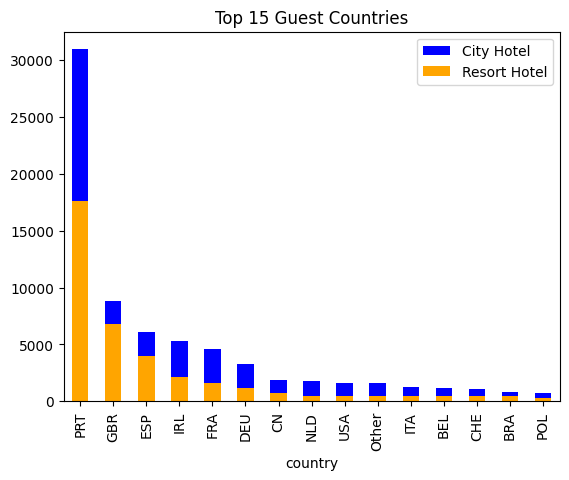

In [23]:
data[data['hotel'] == 'City Hotel']['country'].value_counts().head(15).plot.bar(label = 'City Hotel', color='blue')
data[data['hotel'] == 'Resort Hotel']['country'].value_counts().head(15).plot.bar(label = 'Resort Hotel', color='orange')
plt.title('Top 15 Guest Countries')
plt.legend()
plt.show()

Both hotels are located in Portugal, so as per expectation the majority of the customers are from Portugal. The other top 14 countries are mostly European countries.

<Axes: title={'center': 'Adult Guests per Hotel type'}, xlabel='adults', ylabel='count'>

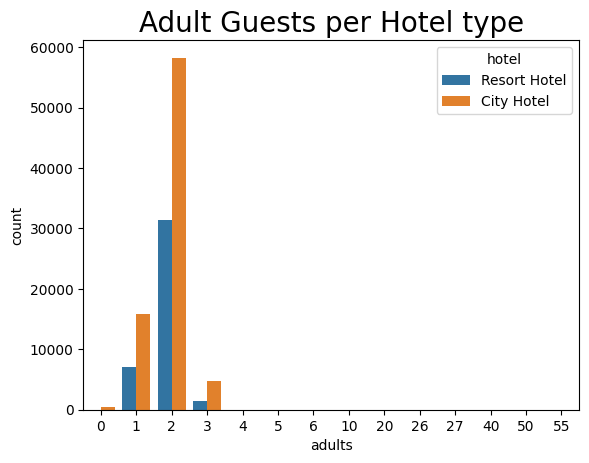

In [24]:
plt.title("Adult Guests per Hotel type", fontdict = {'fontsize':20})
sns.countplot(x = "adults", hue = 'hotel', data = data)

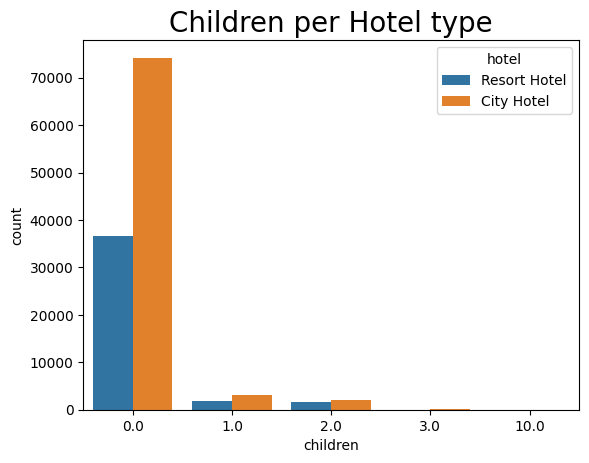

In [25]:
plt.title("Children per Hotel type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "children", hue = 'hotel', data = data)

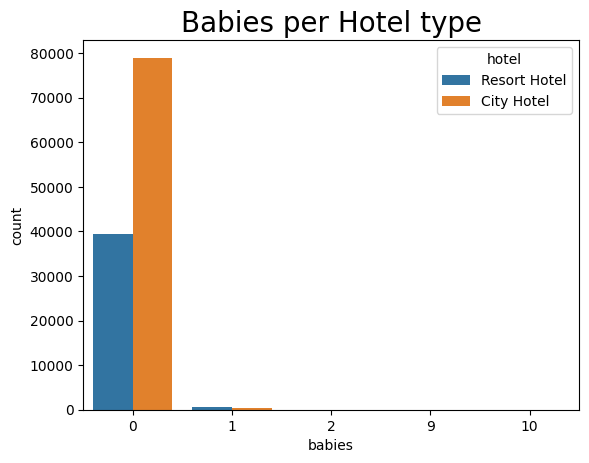

In [26]:
plt.title("Babies per Hotel type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "babies", hue = 'hotel', data = data)

The City Hotel has more guests than the Resort Hotel. Both seem to be geared towards adults and not families. Majority of guests could be safely assumed to be couples.

In [27]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [29]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
# Create a new column 'arrival_date' of type datetime by combining integer values
data['arrival_date'] = pd.to_datetime(data[['arrival_date_year', 'arrival_date_month']].astype(str).agg('-'.join, axis=1))

# Print the updated DataFrame
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


Let's consider the travellers from Portugal as local travellers, and others as international travellers.

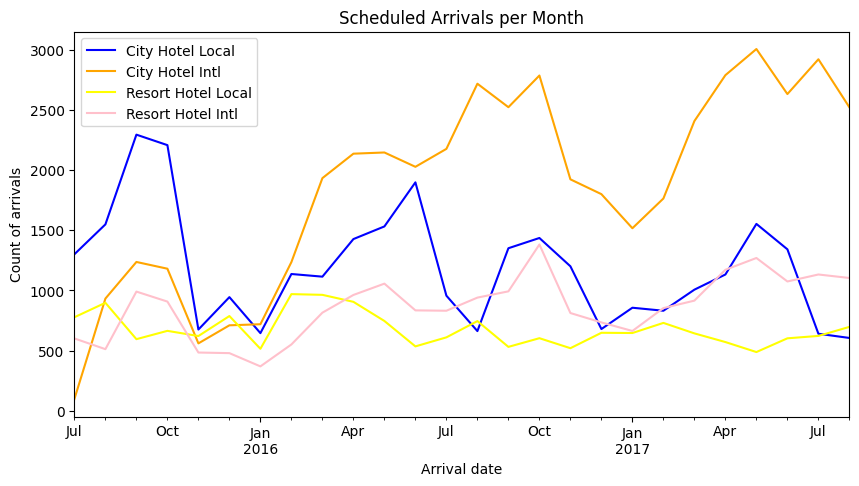

In [31]:
data[(data['hotel'] == "City Hotel") & (data['country'] == 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='City Hotel Local', color='blue')
data[(data['hotel'] == "City Hotel") & (data['country'] != 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='City Hotel Intl', color='orange')
data[(data['hotel'] == "Resort Hotel") & (data['country'] == 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='Resort Hotel Local', color='yellow')
data[(data['hotel'] == "Resort Hotel") & (data['country'] != 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='Resort Hotel Intl', color='pink')
plt.title('Scheduled Arrivals per Month')
plt.xlabel('Arrival date')
plt.ylabel('Count of arrivals')
plt.legend()
plt.show()

Towards the end of 2015, the highest number of reservations were from local travellers to City Hotel. After 2016, there is a significant increase in international traveller to City Hotel, as well as a decrease in local travellers to City Hotel. Both local and international travellers to Resort Hotel has remained consistent throughout the period.

All hotels experience the lowest number of bookings in December-January.

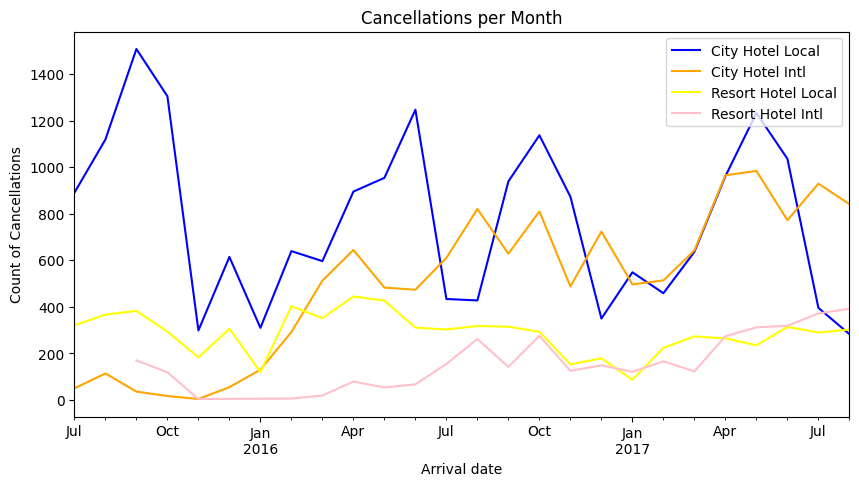

In [32]:
data[(data['hotel'] == "City Hotel") & (data['country'] == 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='City Hotel Local', color='blue')
data[(data['hotel'] == "City Hotel") & (data['country'] != 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='City Hotel Intl', color='orange')
data[(data['hotel'] == "Resort Hotel") & (data['country'] == 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='Resort Hotel Local', color='yellow')
data[(data['hotel'] == "Resort Hotel") & (data['country'] != 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(figsize=(10, 5), label='Resort Hotel Intl', color='pink')
plt.title('Cancellations per Month')
plt.xlabel('Arrival date')
plt.ylabel('Count of Cancellations')
plt.legend()
plt.show()

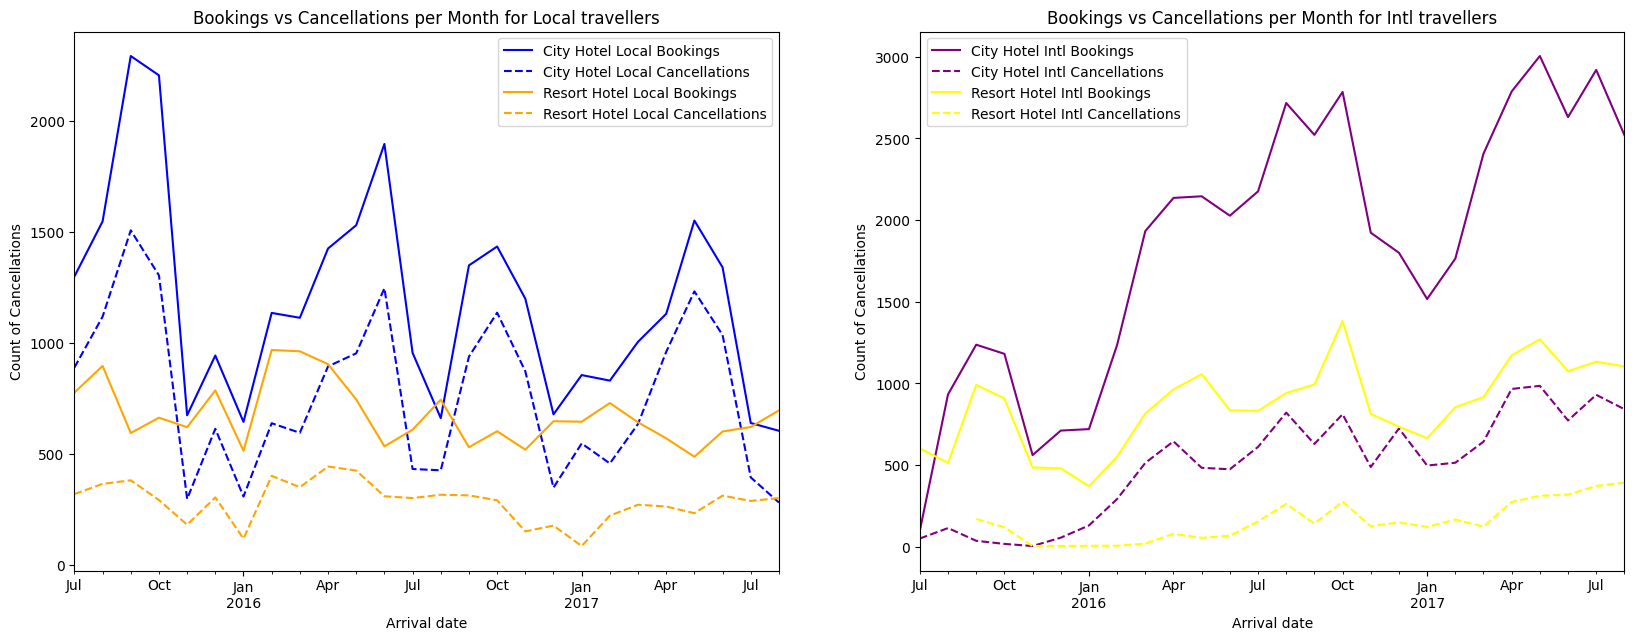

In [33]:
import matplotlib.pyplot as plt

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Chart 1 - City Hotel Local
data[(data['hotel'] == "City Hotel") & (data['country'] == 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[0], label='City Hotel Local Bookings', color='blue')
data[(data['hotel'] == "City Hotel") & (data['country'] == 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[0], label='City Hotel Local Cancellations', color='blue', linestyle='--')
data[(data['hotel'] == "Resort Hotel") & (data['country'] == 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[0], label='Resort Hotel Local Bookings', color='orange')
data[(data['hotel'] == "Resort Hotel") & (data['country'] == 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[0], label='Resort Hotel Local Cancellations', color='orange', linestyle='--')

axes[0].set_title('Bookings vs Cancellations per Month for Local travellers')
axes[0].set_xlabel('Arrival date')
axes[0].set_ylabel('Count of Cancellations')
axes[0].legend()

# Chart 2 - City Hotel Intl
data[(data['hotel'] == "City Hotel") & (data['country'] != 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[1], label='City Hotel Intl Bookings', color='purple')
data[(data['hotel'] == "City Hotel") & (data['country'] != 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[1], label='City Hotel Intl Cancellations', color='purple', linestyle='--')
data[(data['hotel'] == "Resort Hotel") & (data['country'] != 'PRT')].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[1], label='Resort Hotel Intl Bookings', color='yellow')
data[(data['hotel'] == "Resort Hotel") & (data['country'] != 'PRT') & (data['is_canceled'] == 1)].groupby(by='arrival_date')['arrival_date_month'].count().plot(ax=axes[1], label='Resort Hotel Intl Cancellations', color='yellow', linestyle='--')
axes[1].set_title('Bookings vs Cancellations per Month for Intl travellers')
axes[1].set_xlabel('Arrival date')
axes[1].set_ylabel('Count of Cancellations')
axes[1].legend()

# Adjust layout
#plt.tight_layout()
plt.show()


For all local bookings and Resort Hotel intl bookings, the number of cancellations is consistent with the number of bookings. This however does not appear to be the case with City Hotel intl bookings, where over the period the large increase in intl bookings outpaces the number of cancellations. 

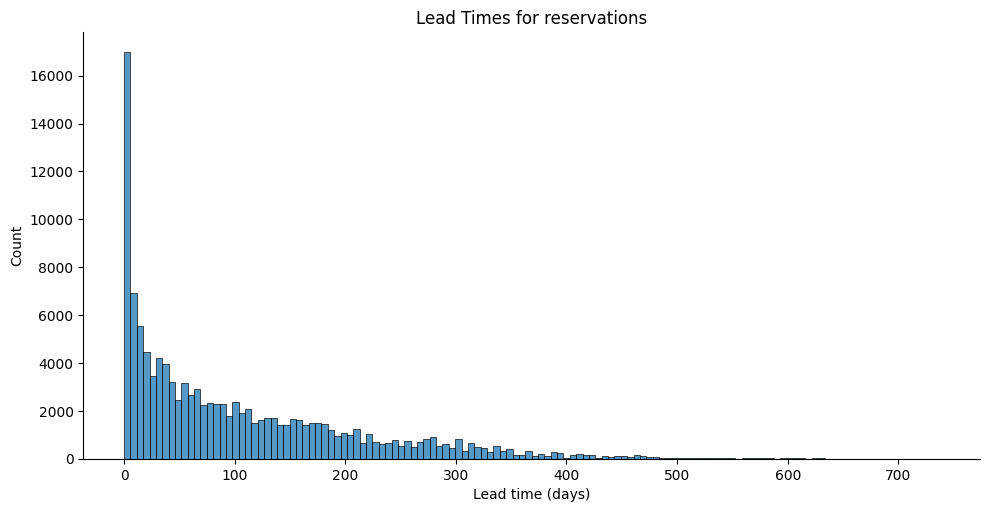

In [34]:
sns.displot(data=data['lead_time'], height=5, aspect=2)
plt.title('Lead Times for reservations')
plt.xlabel('Lead time (days)')
plt.show()

Lead time is the number of days that elapsed between the entering date of the booking and the arrival date. This indicates that the most frequently recorded lead time is 0 days, meaning the reservations were booked on the same date the customers arrived. Let's see if most of these are due to local travellers.

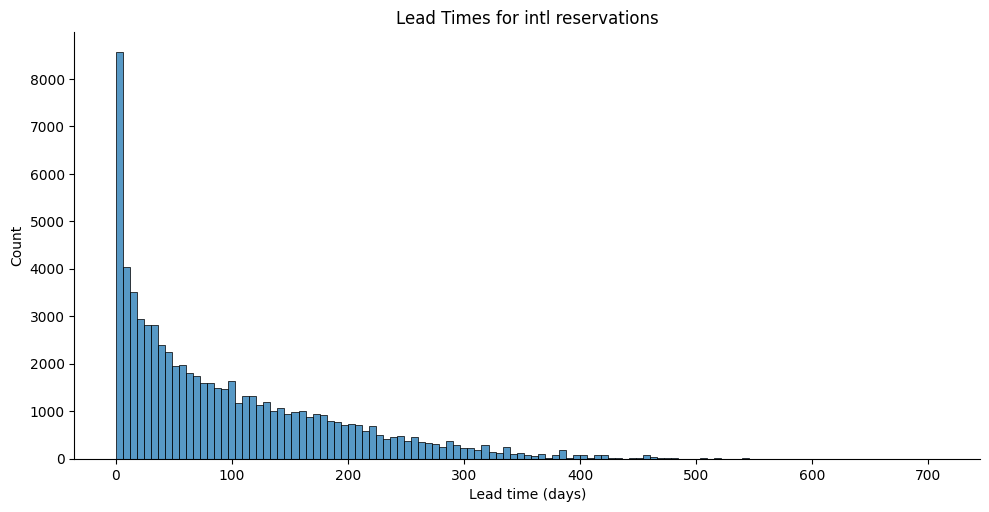

In [35]:
sns.displot(data=data[data['country'] != 'PRT']['lead_time'], height=5, aspect=2)
plt.title('Lead Times for intl reservations')
plt.xlabel('Lead time (days)')
plt.show()

There are a number of intl reserations where the lead time is 0. This is likely other European countries.

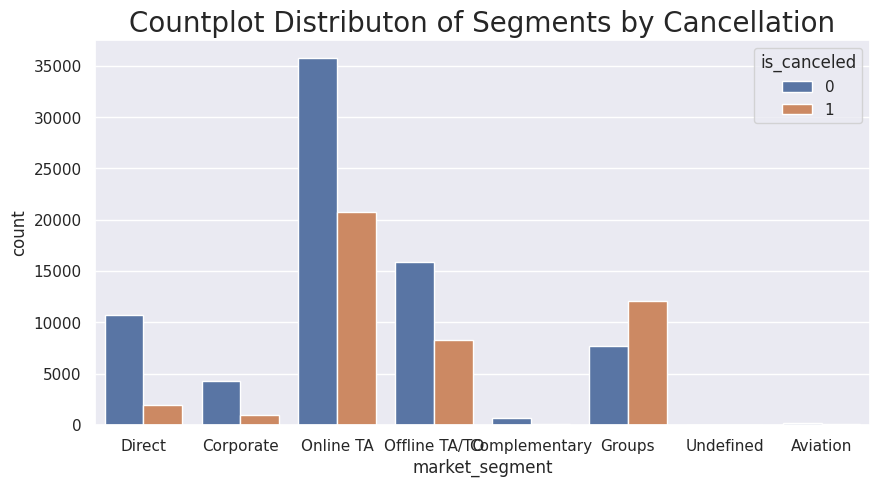

In [36]:
plt.figure(figsize = (10,5))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came. It is quite logical to apply a deposit for a large number of customers who will fill important amount of the hotel capacity.

As a first thought, I expected the cancellation rate in the market segments where a deposit is applied to be lower than the other segments where no deposit applied. But when we look at the cancellations according to the segments in the other visualization, it seems that this is not the case.

- Groups segment has cancellation rate more than 50%.
- Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%.
- Direct segment has cancellation rate less than 20%.

It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like reservations may explain this situation a bit.

Cancellation rates for online reservations are as expected in a dynamic environment where the circulation is high.


### Handling Features

In [37]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [38]:
# I wanted to label them manually. I will do the rest with get.dummies or label_encoder.
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

In [39]:
data['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [40]:
num_cols = data.select_dtypes(include=['number']).columns

pd.set_option('display.max_columns', None)
data[num_cols].describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.664461,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,480.552107,2.321149,101.831122,0.062518,0.571363
std,0.472181,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,469.216823,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,1.000000,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,999.000000,391.000000,5400.000000,8.000000,5.000000


In [41]:
cols_to_check = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Correlation & Multicollinearity Check

In [42]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [43]:
# Lets copy data to check the correlation between variables.
cor_data = data.copy()

In [44]:
le = LabelEncoder()

In [45]:
# This data will not be used while predicting cancellation. This is just for checking correlation.
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])
cor_data['country'] = le.fit_transform(cor_data['country'])
cor_data['deposit_type'] = le.fit_transform(cor_data['deposit_type'])

In [46]:
cor_data = cor_data.drop(columns = ['reservation_status_date', 'arrival_date'])

In [47]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,-0.013183,-0.044210,-0.043434,0.008018,-0.045153,0.083795,0.174419,-0.050421,-0.012292,-0.004441,-0.249677,-0.307834,-0.072820,0.159021,-0.279899,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.017678,0.268690,0.059338,0.167600,-0.084793,0.110133,-0.057358,-0.061282,-0.176028,-0.144381,0.468634,-0.079467,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,0.000349,0.052221,0.013797,0.220414,-0.124410,0.086042,-0.073548,-0.106089,-0.172219,0.000149,0.375667,-0.038869,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.065840,-0.154295,0.107697,0.022644,0.010341,-0.119822,0.029218,0.092809,0.036141,0.030872,-0.064714,-0.036928,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,0.028534,0.005437,0.010172,-0.015205,0.025050,0.001293,0.007381,-0.030729,0.037479,-0.021640,-0.007923,-0.006378,0.004809,0.004048,-0.017633,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.017381,0.025801,-0.000510,0.005699,-0.030131,0.035501,-0.020904,-0.007997,-0.005684,0.005508,0.003891,-0.015454,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.007086,-0.000816,-0.004088,0.001578,-0.006145,-0.027011,-0.000300,0.016929,0.011646,0.010613,-0.001358,0.000748,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,0.045744,-0.128674,0.115350,0.093097,-0.087239,-0.012775,-0.042715,0.142083,0.086643,0.063281,-0.111435,0.014162,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,0.036742,-0.121392,0.108569,0.087185,-0.097245,-0.013992,-0.048743,0.168616,0.100795,0.096209,-0.076788,0.045517,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
adults,-0.013183,0.060017,0.119519,0.029635,0.028534,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,0.026327,-0.110664,0.208409,0.178978,-0.146426,-0.006738,-0.107983,0.211434,0.144779,-0.051673,-0.027644,-0.179732,-0.008283,-0.101756,0.230641,0.014785,0.122884,-0.071802


<Axes: >

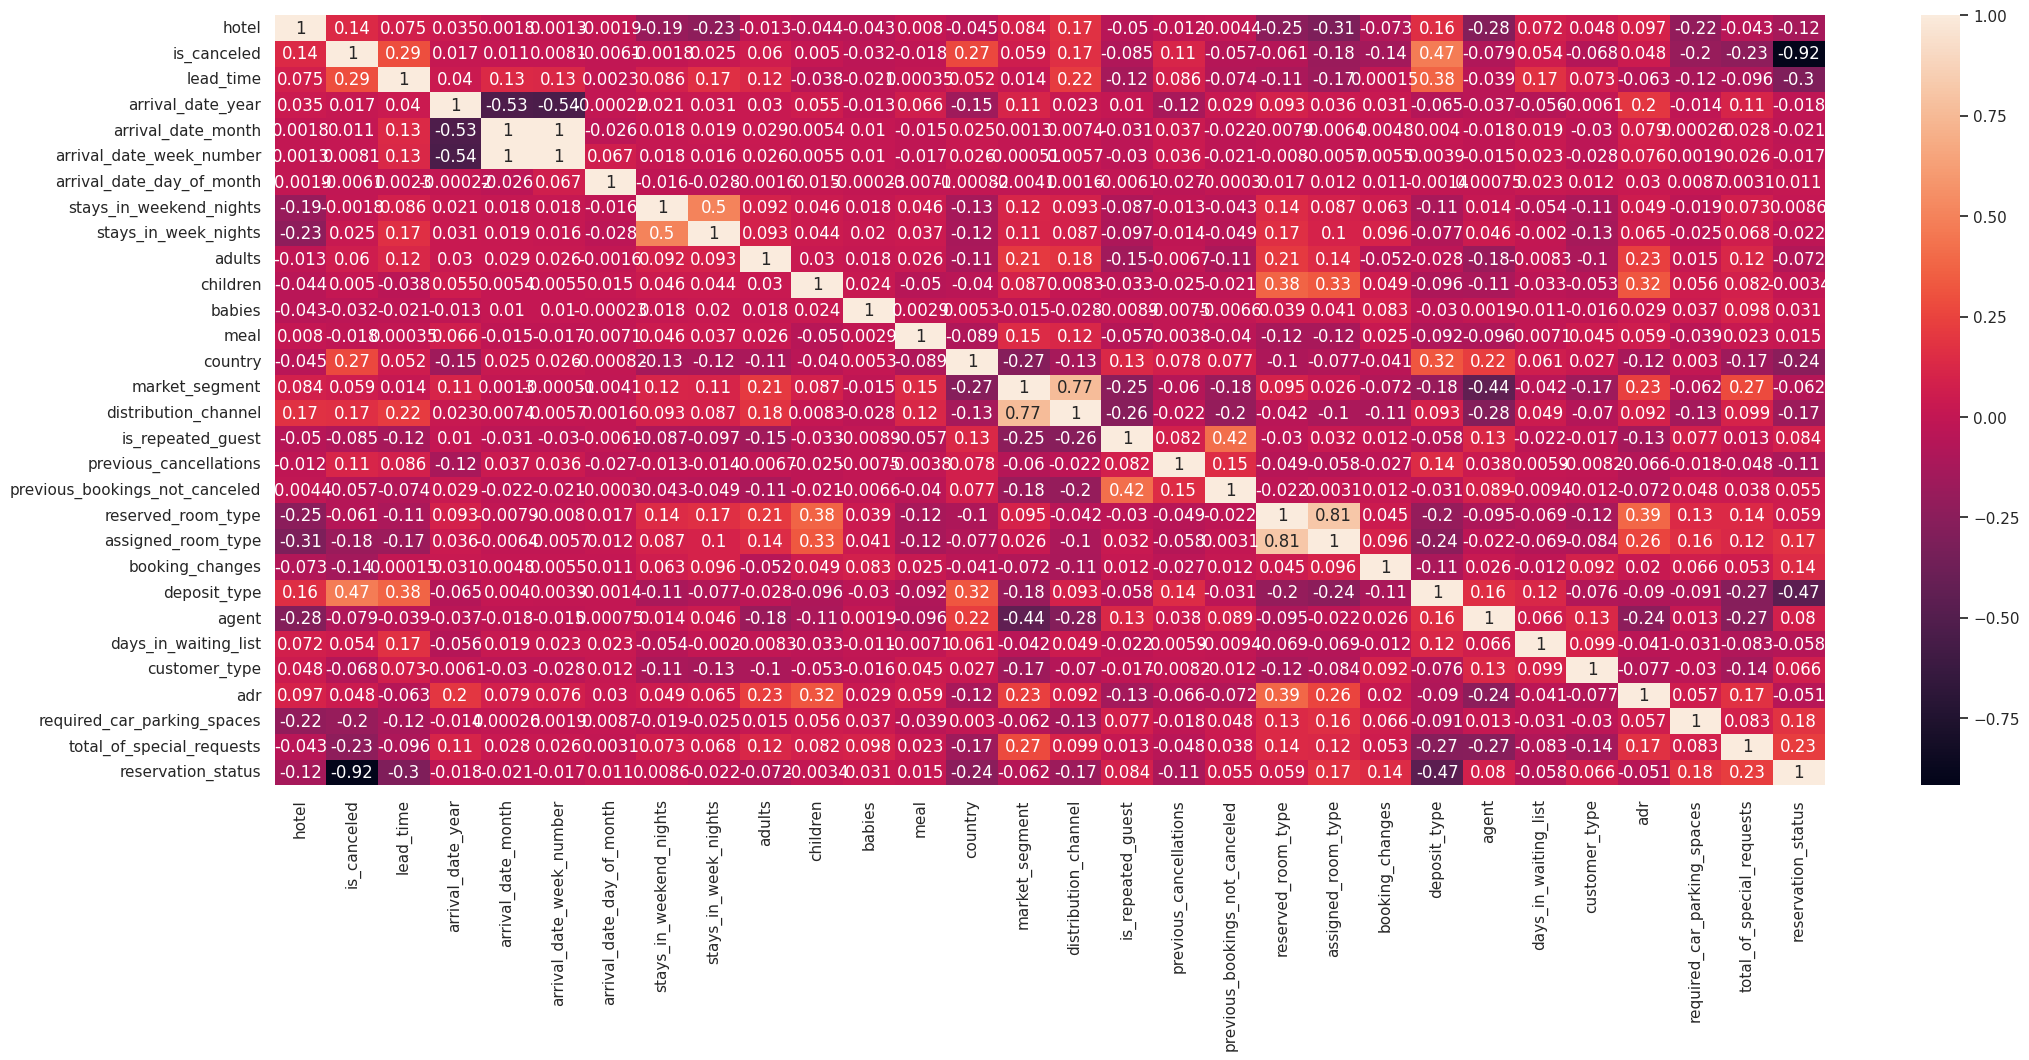

In [48]:
plt.figure(figsize = (25,10))
sns.heatmap(cor_data.corr(), annot=True)

In [49]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
is_repeated_guest                -0.084793
agent                            -0.079467
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
meal                             -0.017678
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
adults                            0.060017
previous_ca

In [50]:
# Find columns with correlation of 0.8 or higher
correlation_matrix = cor_data.corr()
high_correlation_cols_pos = correlation_matrix[correlation_matrix >= 0.8].stack().drop_duplicates().reset_index()
high_correlation_cols_pos = high_correlation_cols_pos[high_correlation_cols_pos['level_0'] != high_correlation_cols_pos['level_1']]
# Print the columns with high correlation
print(high_correlation_cols_pos)

print("\n")

high_correlation_cols_neg = correlation_matrix[correlation_matrix <= -0.8].stack().drop_duplicates().reset_index()
high_correlation_cols_neg = high_correlation_cols_neg[high_correlation_cols_neg['level_0'] != high_correlation_cols_neg['level_1']]
# Print the columns with high correlation
print(high_correlation_cols_neg)

              level_0                   level_1         0
1  arrival_date_month  arrival_date_week_number  0.995105
2  reserved_room_type        assigned_room_type  0.814005


       level_0             level_1         0
0  is_canceled  reservation_status -0.917196


Based on this result we drop reserved_room_type, arrival_date_week_number and reservation_status. We also drop agent as that has many values and would not be a strong predictor. We also drop arrival_date (we had created that earlier for EDA)

In [51]:
data = data.drop(columns = ['reserved_room_type', 'arrival_date_week_number', 'reservation_status', 'agent', 'reservation_status_date', 'arrival_date'], axis = 1)

In [52]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [53]:
data.head().transpose()

,0,1,2,3,4
hotel,0,0,0,0,0
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,7,7,7,7,7
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2
children,0.0,0.0,0.0,0.0,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [55]:
categorical_columns = [column for column in data.columns if data[column].dtype == 'object']

for col in categorical_columns:
  print(col)
  print(data[col].unique())
  print(data[col].value_counts())

meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Other' 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN

In [56]:
# I keep data in case of any changes on features, missing values etc.
df1 = data.copy()

In [57]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,2015,7,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.0,0,0
1,0,0,737,2015,7,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.0,0,0
2,0,0,7,2015,7,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,C,0,No Deposit,0,Transient,75.0,0,0
3,0,0,13,2015,7,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0
4,0,0,14,2015,7,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.0,0,1


There are a large number of countries, and there are some that appear very infrequently in the data set (e.g. some appear only once). For those that appear infrequently (less than 1%) we can replace those with "Other" as they do not add to any prediction.

In [58]:
for col in df1['country'].value_counts().index[df1['country'].value_counts() >= 2000]:
  print(col)

PRT
GBR
FRA
ESP
DEU
ITA
IRL
BEL
BRA
NLD
USA


In [59]:
df1_countries = df1.copy()
df1_countries['country'].replace(to_replace=df1_countries['country'].value_counts().index[df1_countries['country'].value_counts() < 2000], value='Other', inplace=True)

In [60]:
numerical_features = df1_countries.select_dtypes(include=['float64', 'int64'])

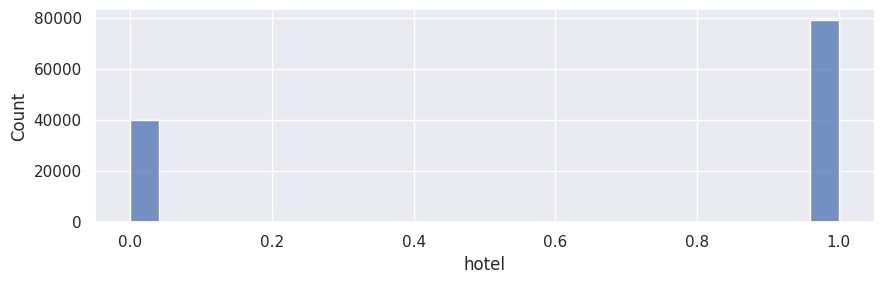

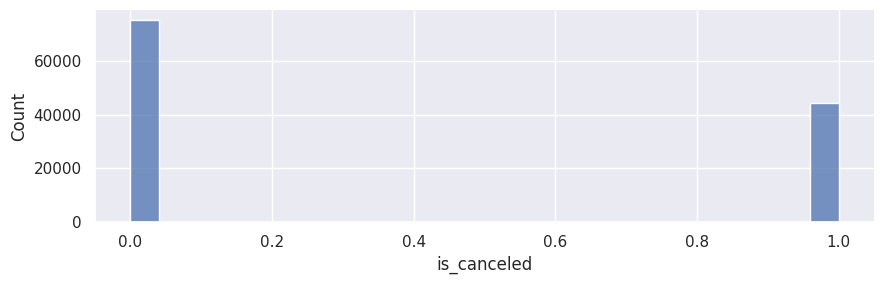

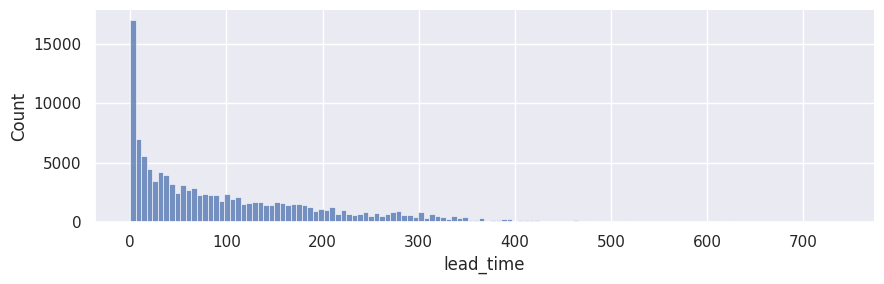

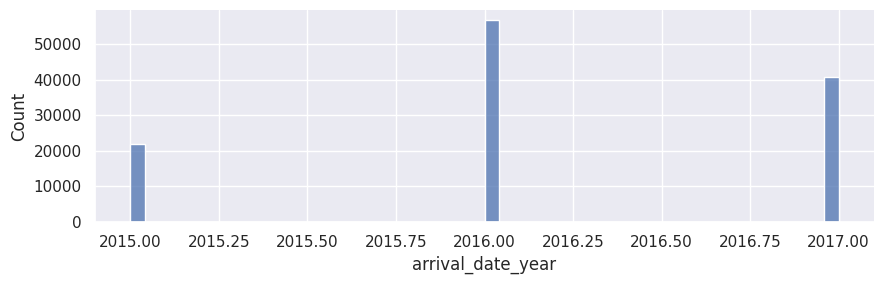

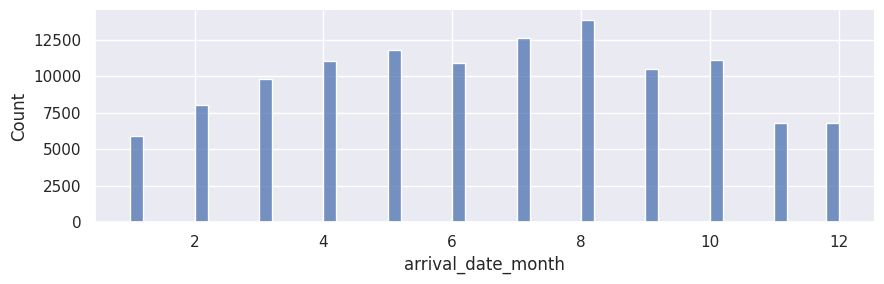

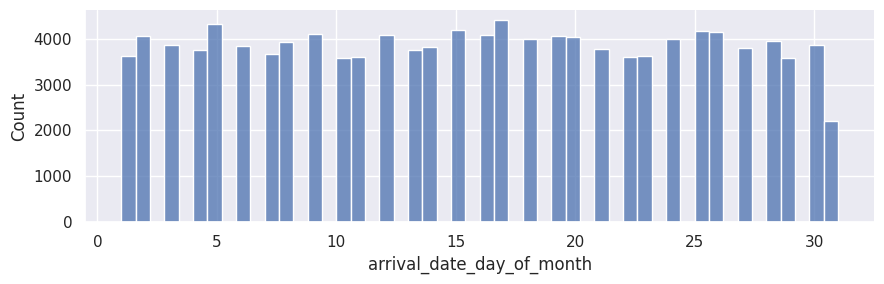

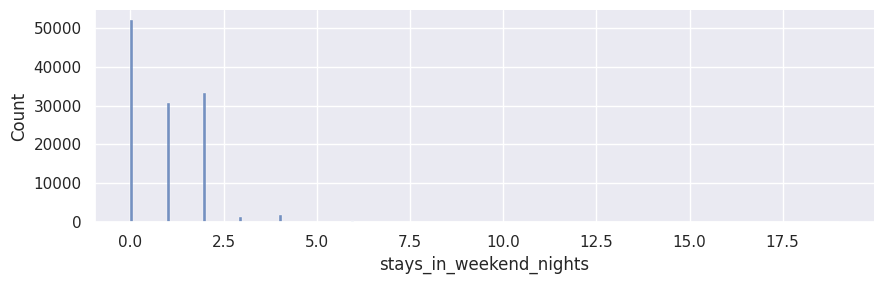

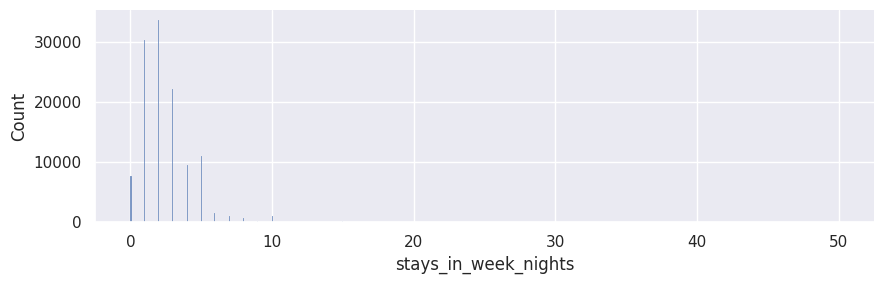

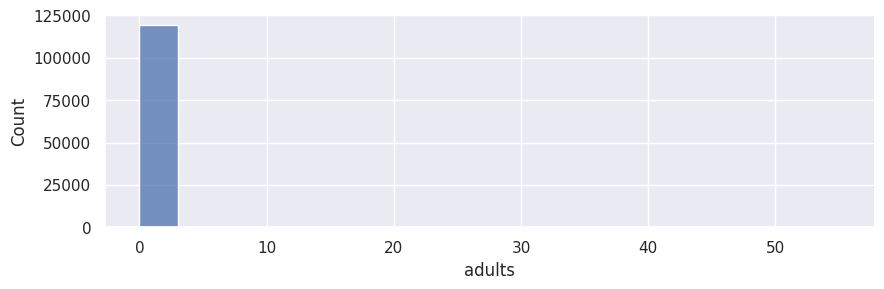

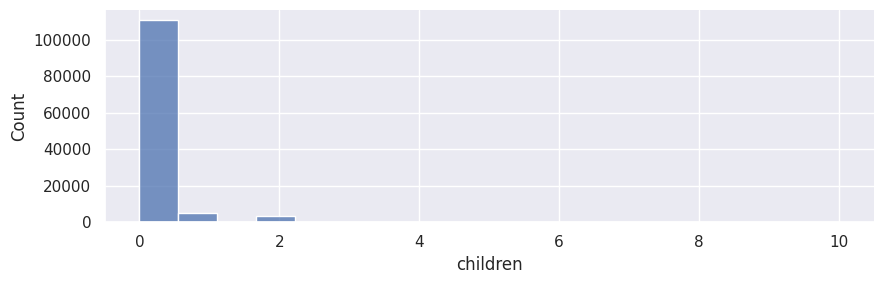

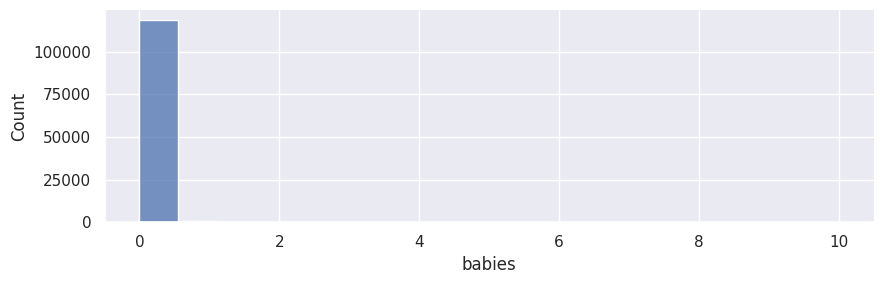

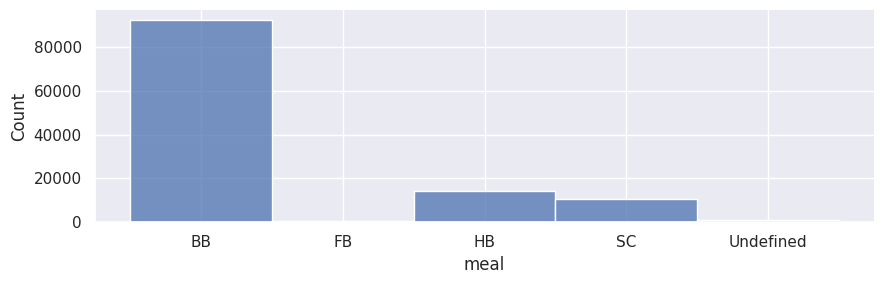

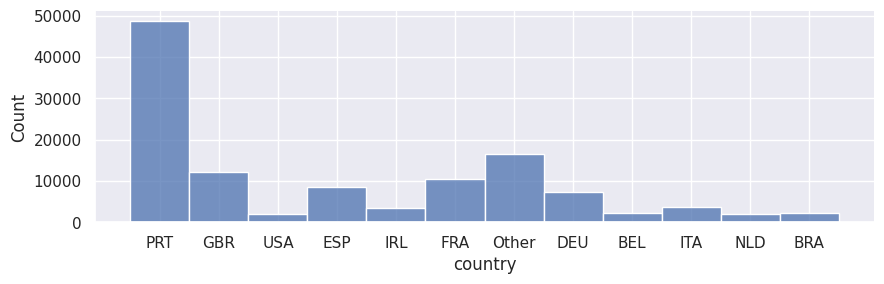

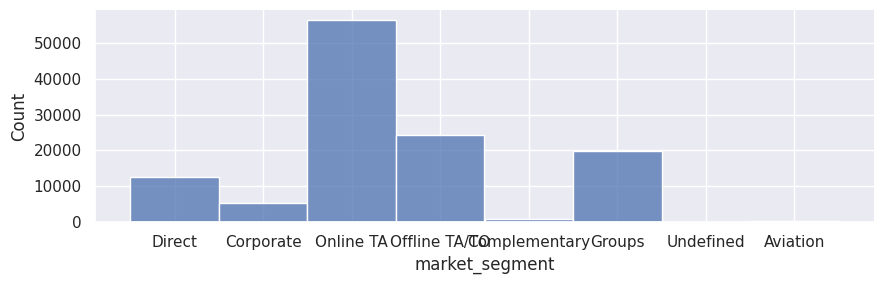

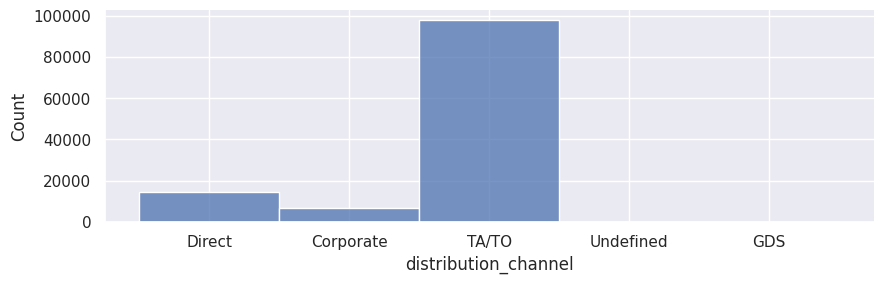

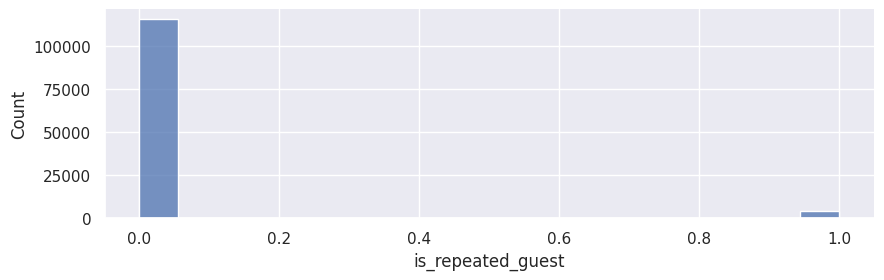

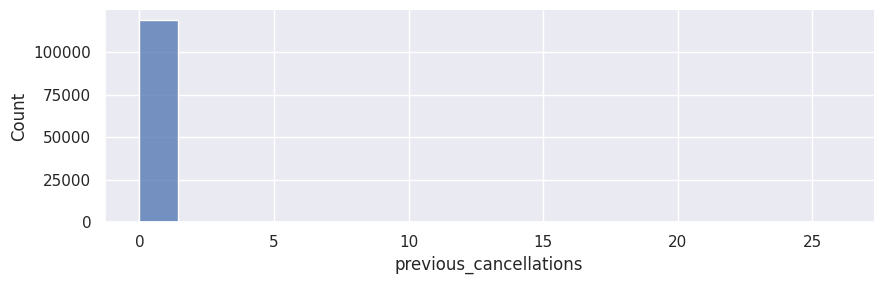

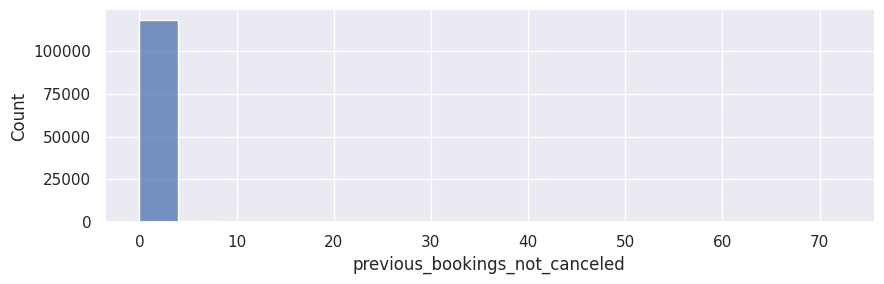

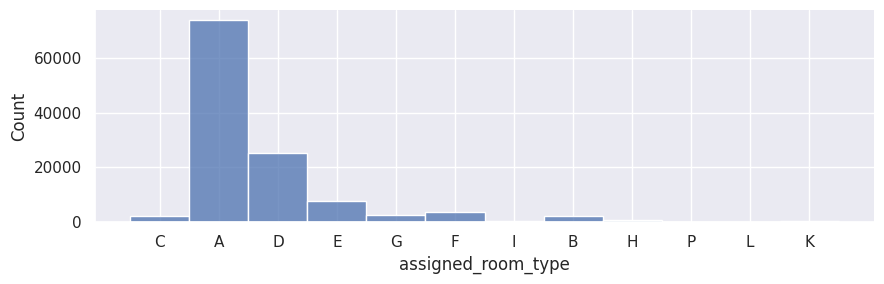

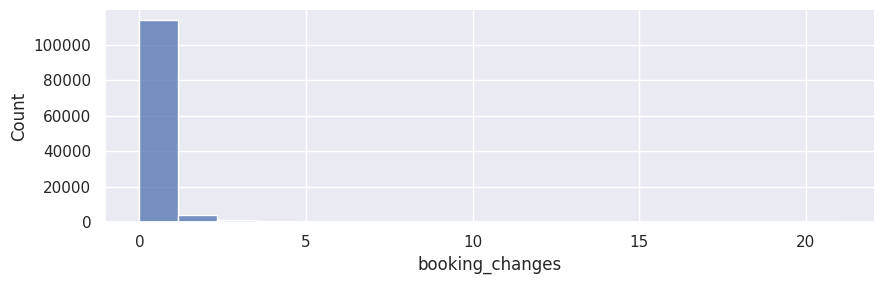

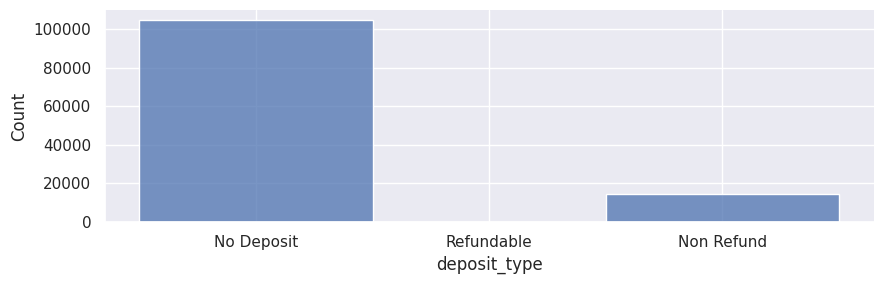

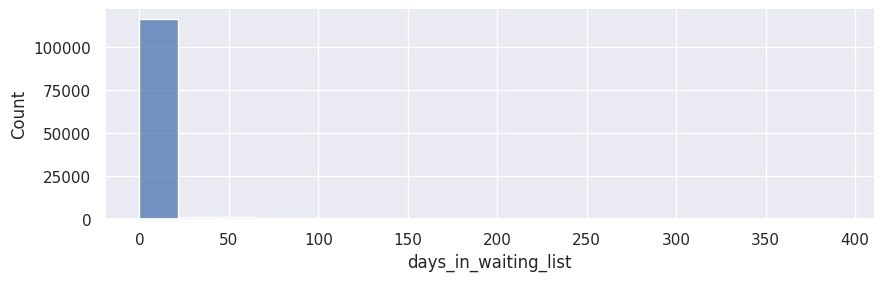

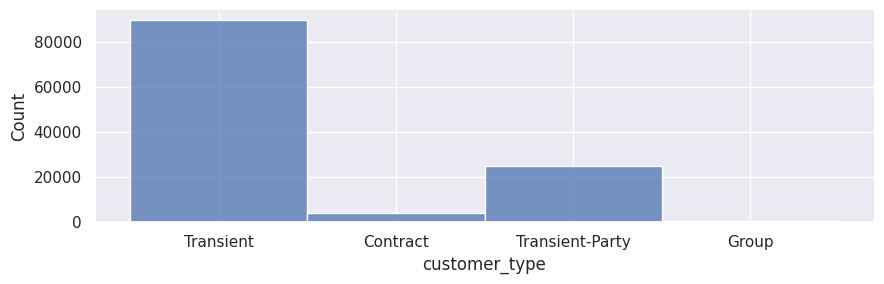

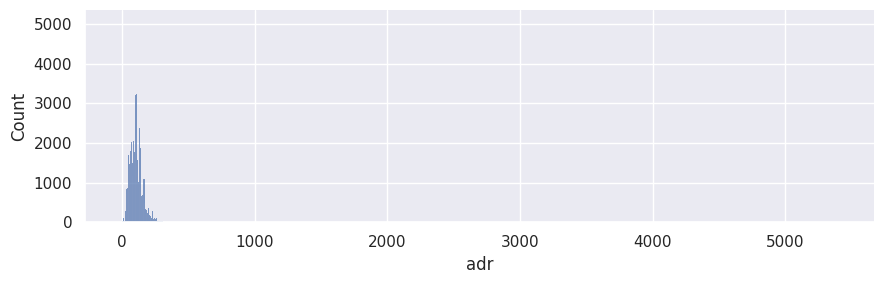

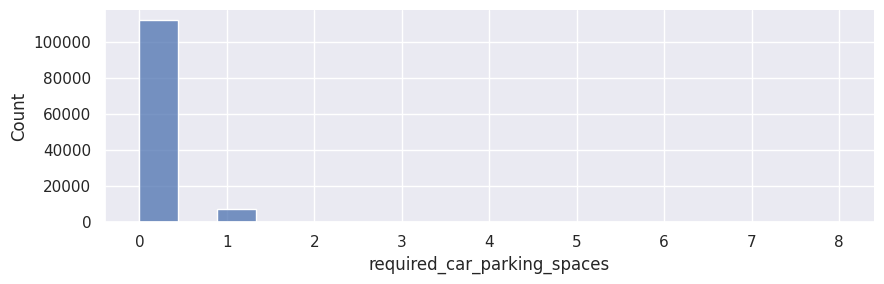

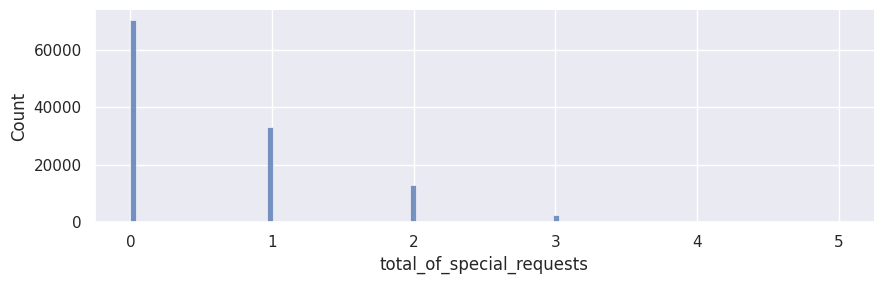

In [61]:
for col in df1_countries.columns:
  #plt.figure(figsize = (3,7))
  sns.displot(df1_countries[col], height=3, aspect=3.0)
  plt.show()

In [62]:
#one-hot-encoding
df1_countries = pd.get_dummies(data = df1_countries, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'assigned_room_type', 'deposit_type', 'customer_type', 'country'])

Let's check distribution of features as this will determine if we use StandardScaler or MinMaxScaler in preparation for predictive analysis

Most features are not normally distributed, as such its best to use MinMaxScaler

In [63]:
df2 = df1.copy()

In [64]:
y_c = df1_countries["is_canceled"]
X_c = df1_countries.drop(["is_canceled"], axis=1)

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size = 0.30, random_state = 42)

In [65]:
def ROC(y_test, y_prob):

    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.figure(figsize = (5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# Logistic Regression

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
ss = MinMaxScaler()
X_c_train_scaled = X_c_train
X_c_test_scaled = X_c_test
X_c_train_scaled[cols_to_check] = ss.fit_transform(X_c_train_scaled[cols_to_check])
X_c_test_scaled[cols_to_check] = ss.transform(X_c_test_scaled[cols_to_check])


print('Model: Logistic Regression\n')
lr_model = LogisticRegression(solver = "liblinear")
lr_model = lr_model.fit(X_c_train_scaled, y_c_train)
y_prob = lr_model.predict_proba(X_c_test)[:,1]
y_pred = lr_model.predict(X_c_test)

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_c_test,y_pred), confusion_matrix(y_c_test,y_pred)))

Model: Logistic Regression

Accuracy Score: 0.79384091353268

Confusion Matrix:
 [[20520  1958]
 [ 5426  7913]]


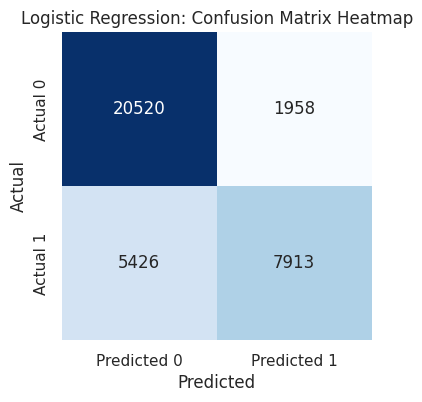

Confusion Matrix:
True Negative: 20520
False Positive: 1958
False Negative: 5426
True Positive: 7913

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     22478
           1       0.80      0.59      0.68     13339

    accuracy                           0.79     35817
   macro avg       0.80      0.75      0.76     35817
weighted avg       0.79      0.79      0.79     35817



In [68]:
from sklearn.metrics import classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_c_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix Heatmap')
plt.show()

# Extract confusion matrix values
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

# Print confusion matrix values
print('Confusion Matrix:')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print()

# Print other classification metrics
report = classification_report(y_c_test, y_pred)
print('Classification Report:')
print(report)


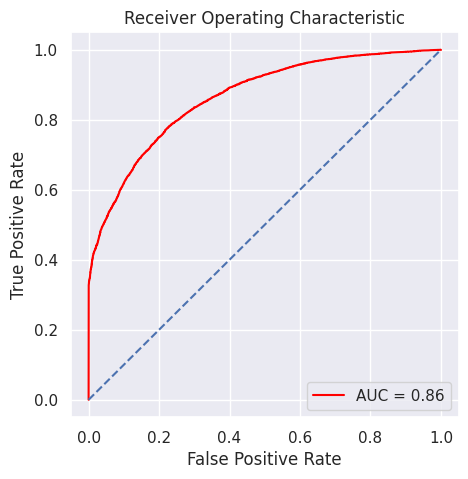

In [69]:
ROC(y_c_test, y_prob)

# Random Forest

In [70]:
ss = MinMaxScaler()

X_c_train_scaled = X_c_train
X_c_test_scaled = X_c_test
X_c_train_scaled[cols_to_check] = ss.fit_transform(X_c_train_scaled[cols_to_check])
X_c_test_scaled[cols_to_check] = ss.transform(X_c_test_scaled[cols_to_check])


In [71]:
print('Model: Random Forest\n')
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_c_train_scaled, y_c_train)
y_prob = rf_model.predict_proba(X_c_test)[:,1]
y_pred = rf_model.predict(X_c_test)

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_c_test,y_pred), confusion_matrix(y_c_test,y_pred)))

Model: Random Forest

Accuracy Score: 0.8891587793505877

Confusion Matrix:
 [[21058  1420]
 [ 2550 10789]]


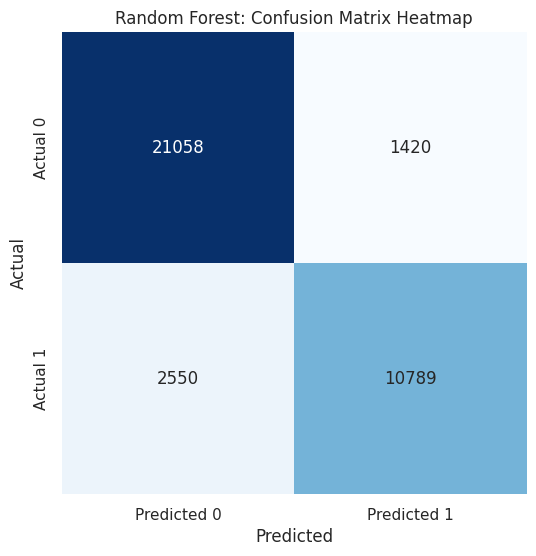

Confusion Matrix:
True Negative: 21058
False Positive: 1420
False Negative: 2550
True Positive: 10789

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22478
           1       0.88      0.81      0.84     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [72]:
# Calculate confusion matrix
cm = confusion_matrix(y_c_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest: Confusion Matrix Heatmap')
plt.show()

# Extract confusion matrix values
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

# Print confusion matrix values
print('Confusion Matrix:')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print()

# Print other classification metrics
report = classification_report(y_c_test, y_pred)
print('Classification Report:')
print(report)

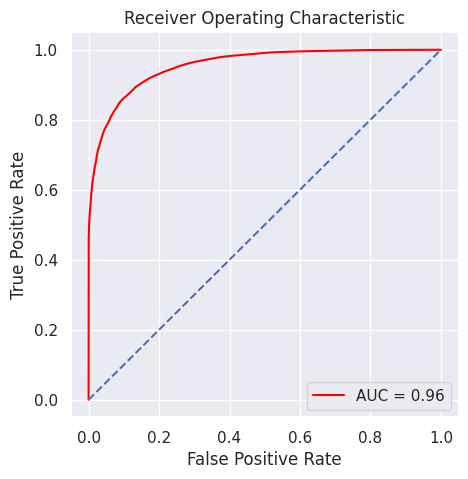

In [73]:
ROC(y_c_test, y_prob)

Random Forest has a better result as compared to Logistic Regression, so we will move ahead with Random Forest.

# Feature Importances

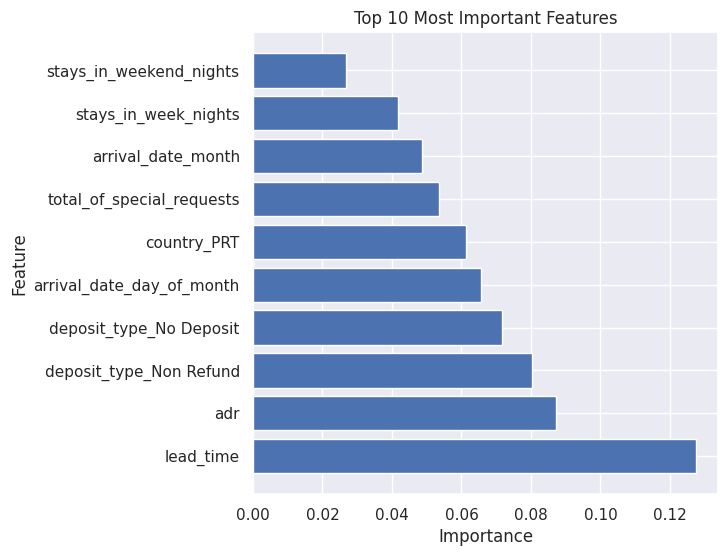

In [74]:
# Assuming rf_model is already defined and fitted

feature_importance = rf_model.feature_importances_

# Create a dataframe with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_c_train_scaled.columns, 'Importance': feature_importance})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Create a bar chart of feature importances
plt.figure(figsize=(6, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()


# Business Impact Analysis

For the period 1st of July of 2015 to the 31st of August 2017 in this data set, out of 119K bookings, the model was able to predict 81% (13,339) of the actual cancellations. As such there is a further 19% of cancellations the model did not identify. The actual number of overall estimated cancellations would thus be 16,467 cancellations over the period.

- Total count of bookings: 119,390
- Total actual estimated cancellations: 16,467. The hotel can use this estimate in their overbooking strategy.
- Cancellations likely to be correct: 11,871 (89% of 13,339 predicted cancellations). These are customers that are likely to cancel. The hotel can then employ strategies for these customers. 
- Additional cancellations the model missed: 3,128 (16467 total estimated - 13339 total identified)
- Uncertain cancellations: 1,468 (13339 predicted - 11871 correctly predicted)


***Note: All figures are estimates***

Lead time is the most significant of all the features that affects cancellations.

We now need to communicate to the hotel our predictions of cancelled bookings for the upcoming month.

The dataset has data up to August 2017. Let us assume that the current month is the end of July 2017, and we need to communicate to the hotel our predictions of cancelled bookings for August.

In [75]:
#We remove the data with August 2017 from the dataset
df1_countries_orig = df1_countries.copy()
df1_countries = df1_countries[~((df1_countries['arrival_date_year'] == 2017) & (df1_countries['arrival_date_month'] == 8))]
df1_countries.shape

(114465, 68)

In [76]:
df1_countries[(df1_countries['arrival_date_year'] == 2017) & (df1_countries['arrival_date_month'] == 8)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_BEL,country_BRA,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_Other,country_PRT,country_USA


We train our model on all historical data.

Accuracy Score: 0.8895457192778101

Confusion Matrix:
 [[20186  1290]
 [ 2503 10361]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     21476
           1       0.89      0.81      0.85     12864

    accuracy                           0.89     34340
   macro avg       0.89      0.87      0.88     34340
weighted avg       0.89      0.89      0.89     34340



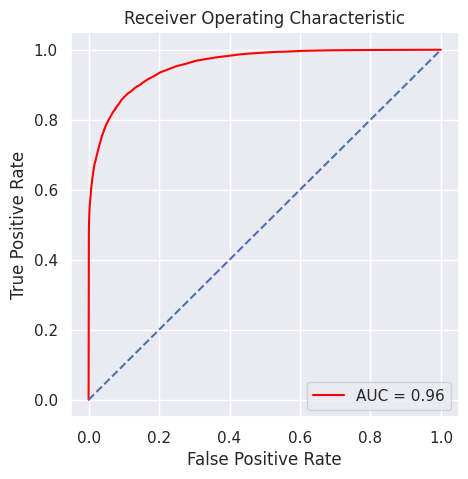

In [77]:
#df1_countries now contains all data excluding bookings for August 2017.
y2 = df1_countries["is_canceled"]
X2 = df1_countries.drop(["is_canceled"], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, random_state = 42)


X2_train_scaled = X2_train
X2_test_scaled = X2_test
X2_train_scaled[cols_to_check] = ss.fit_transform(X2_train_scaled[cols_to_check])
X2_test_scaled[cols_to_check] = ss.transform(X2_test_scaled[cols_to_check])

rf_model = RandomForestClassifier()

rf_model.fit(X2_train_scaled, y2_train)

y_prob = rf_model.predict_proba(X2_test)[:,1]
y_pred = rf_model.predict(X2_test)

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y2_test,y_pred), confusion_matrix(y2_test,y_pred)))

report = classification_report(y2_test, y_pred)
print('Classification Report:')
print(report)

ROC(y2_test, y_prob)




We use the full dataset (August 2017 bookings as well as all previous bookings) in our predictive analysis

In [78]:
#df1_countries_orig contains all data, including August 2017.
y3 = df1_countries_orig["is_canceled"]
X3 = df1_countries_orig.drop(["is_canceled"], axis=1)

X3_scaled = X3
X3_scaled[cols_to_check] = ss.fit_transform(X3_scaled[cols_to_check])

prediction = rf_model.predict(X3_scaled)

We add the results of our predictions to our cleaned dataset. This is what we will present to the hotel.

In [79]:
df_predictions = pd.DataFrame({'Predicted Cancellations' : prediction})

In [80]:
df_predictions.shape

(119390, 1)

In [81]:
df_orig.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [82]:
df_orig_pred = pd.concat([df_orig,df_predictions], axis = 1)
df_orig_pred.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Predicted Cancellations
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [83]:
df_orig_pred[df_orig_pred['Predicted Cancellations'] == 1]['Predicted Cancellations'].count()

42272

In [84]:
df_orig_pred[df_orig_pred['is_canceled'] == 1]['is_canceled'].count()

44224

In [85]:
#df_orig_pred.to_csv('HotelBookingReport.csv', index=False)